<h2>Analisis y correccion del dataset<h2>

primero establecemos el entorno en el que se va a trabajar exportando todas las librerias necesarias para el analisis de los datos y 
la creación de recursos gráficos

In [88]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Se carga la base de datos usando la libreria pandas

In [89]:
df= pd.read_csv("C:/Users/chava/Downloads/ciencia de datos magol/proyecto final introduccion a ciencia de datos/Base_limpia.csv")
df.head()

edad  género     etnia nivel_educativo nivel_ingresos estado_laboral  \
0    58    Male     Asian      Highschool   Lower-Middle       Employed   
1    48  Female     White      Highschool         Middle       Employed   
2    60    Male  Hispanic      Highschool         Middle     Unemployed   
3    74  Female     Black      Highschool            Low        Retired   
4    46    Male     White        Graduate         Middle        Retired   

  hábito_fumar  consumo_alcohol_semana  actividad_física_minutos_semana  \
0        Never                       0                              215   
1       Former                       1                              143   
2        Never                       1                               57   
3        Never                       0                               49   
4        Never                       1                              109   

   puntaje_dieta  ...  colesterol_hdl  colesterol_ldl  triglicéridos  \
0            5.7  ...              41             160            145   
1            6.4  ...              55              50             30   
2            6.4  ...              50              99             36   
3            3.4  ...              50              79            140   
4            7.2  ...              52             125            160   

   glucosa_ayuno  glucosa_postprandial  nivel_insulina  hba1c  \
0            136                   236            6.36   8.18   
1             93                   150            2.00   5.63   
2            118                   195            5.07   7.51   
3            139                   253            5.28   9.03   
4            137                   184           12.74   7.20   

   puntaje_riesgo_diabetes  etapa_diabetes  diabetes_diagnosticada  
0                     29.6          Type 2                       1  
1                     23.0     No Diabetes                       0  
2                     44.7          Type 2                       1  
3                     38.2          Type 2                       1  
4                     23.5          Type 2                       1  

[5 rows x 31 columns]

traducimos a español los registros que están en inglés

In [91]:
traduccion_de_datos_en_ingles = {
    # Género
    'Male': 'Hombre',
    'Female': 'Mujer',
    'Other': 'Otro',

    # Etnia
    'Asian': 'Asiático',
    'White': 'Blanco',
    'Hispanic': 'Hispano',
    'Black': 'Negro',
    'Other': 'Otro',

    # Nivel educativo
    'Highschool': 'Preparatoria',
    'Graduate': 'Licenciatura',
    'Postgraduate': 'Posgrado',
    'No formal': 'Sin estudios formales',

    # Nivel socioeconómico
    'Low': 'Bajo',
    'Lower-Middle': 'Medio-bajo',
    'Middle': 'Medio',
    'Upper-Middle': 'Medio-alto',
    'High': 'Alto',

    # Estado laboral
    'Employed': 'Empleado',
    'Unemployed': 'Desempleado',
    'Retired': 'Jubilado',
    'Student': 'Estudiante',

    # Tabaquismo
    'Never': 'Nunca',
    'Former': 'Exfumador',
    'Current': 'Fumador actual',

    # Diabetes
    'No Diabetes': 'Sin diabetes',
    'Pre-Diabetes': 'Prediabetes',
    'Type 1': 'Diabetes tipo 1',
    'Type 2': 'Diabetes tipo 2',
    'Gestational': 'Diabetes gestacional'
}
df.replace(traduccion_de_datos_en_ingles, inplace=True)#aplicar la traducción

<h2>1. Descripción General de los Datos<h2>

conteo de datos y variables con los que se va a trabajar

In [92]:
print(f"El dataset contiene {df.shape} datos y columnas respectivamente")



El dataset contiene (100401, 31) datos y columnas respectivamente


mostramos cuales son las columnas con las que se cuenta

In [93]:
df.columns

Index(['edad', 'género', 'etnia', 'nivel_educativo', 'nivel_ingresos',
       'estado_laboral', 'hábito_fumar', 'consumo_alcohol_semana',
       'actividad_física_minutos_semana', 'puntaje_dieta',
       'horas_sueño_por_día', 'horas_pantalla_día',
       'antecedente_familiar_diabetes', 'antecedente_hipertensión',
       'antecedente_cardiovascular', 'imc', 'relación_cintura_cadera',
       'presión_sistólica', 'presión_diastólica', 'frecuencia_cardiaca',
       'colesterol_total', 'colesterol_hdl', 'colesterol_ldl', 'triglicéridos',
       'glucosa_ayuno', 'glucosa_postprandial', 'nivel_insulina', 'hba1c',
       'puntaje_riesgo_diabetes', 'etapa_diabetes', 'diabetes_diagnosticada'],
      dtype='object')

mostramos que tipo de variable es cada columna

In [94]:
df.dtypes


edad                                 int64
género                              object
etnia                               object
nivel_educativo                     object
nivel_ingresos                      object
estado_laboral                      object
hábito_fumar                        object
consumo_alcohol_semana               int64
actividad_física_minutos_semana      int64
puntaje_dieta                      float64
horas_sueño_por_día                float64
horas_pantalla_día                 float64
antecedente_familiar_diabetes        int64
antecedente_hipertensión             int64
antecedente_cardiovascular           int64
imc                                float64
relación_cintura_cadera            float64
presión_sistólica                    int64
presión_diastólica                   int64
frecuencia_cardiaca                  int64
colesterol_total                     int64
colesterol_hdl                       int64
colesterol_ldl                       int64
triglicérid

separamos las variables en dos listas, una para variables categoricas y otra para variables numericas,
tenemos variables como "diabetes_diagnosticada" que se marca como una variable numerica y está en la lista de categorica,
esto lo hice ya que los resgistros que tiene solo son 1 y 0 por lo que se debe trabajar como variable categorica

In [95]:
variables_categoricas= ['género', 'etnia', 'nivel_educativo', 'nivel_ingresos',
       'estado_laboral', 'hábito_fumar',
       'antecedente_familiar_diabetes', 'antecedente_hipertensión',
       'antecedente_cardiovascular', 'etapa_diabetes', 'diabetes_diagnosticada']

variables_numericas= ['edad', 'consumo_alcohol_semana',
       'actividad_física_minutos_semana', 'puntaje_dieta',
       'horas_sueño_por_día', 'horas_pantalla_día', 'imc', 'relación_cintura_cadera',
       'presión_sistólica', 'presión_diastólica', 'frecuencia_cardiaca',
       'colesterol_total', 'colesterol_hdl', 'colesterol_ldl', 'triglicéridos',
       'glucosa_ayuno', 'glucosa_postprandial', 'nivel_insulina', 'hba1c',
       'puntaje_riesgo_diabetes']

ahora para las variables categoricas identificamos cuales son los registros diferentes que tiene cada una

In [96]:
for i in variables_categoricas:
    print(df[i].value_counts())
    


género
Mujer     50425
Hombre    47965
Otro       2011
Name: count, dtype: int64
etnia
Blanco      45176
Hispano     20168
Negro       18057
Asiático    11923
Otro         5077
Name: count, dtype: int64
nivel_educativo
Preparatoria             45113
Licenciatura             35123
Posgrado                 15028
Sin estudios formales     5137
Name: count, dtype: int64
nivel_ingresos
Medio         35316
Medio-bajo    25326
Medio-alto    19888
Bajo          14857
Alto           5014
Name: count, dtype: int64
estado_laboral
Empleado       60354
Jubilado       21892
Desempleado    11943
Estudiante      6212
Name: count, dtype: int64
hábito_fumar
Nunca             60044
Fumador actual    20225
Exfumador         20132
Name: count, dtype: int64
antecedente_familiar_diabetes
0    78372
1    22029
Name: count, dtype: int64
antecedente_hipertensión
0    75265
1    25136
Name: count, dtype: int64
antecedente_cardiovascular
0    92434
1     7967
Name: count, dtype: int64
etapa_diabetes
Diabetes tipo

para las variables numericas se muestran los cuartiles, la media, mediana y desviación estandar

In [97]:
for i in variables_numericas:
    print(df[i].describe())   

count    100401.000000
mean         50.118684
std          15.616850
min          18.000000
25%          39.000000
50%          50.000000
75%          61.000000
max          90.000000
Name: edad, dtype: float64
count    100401.000000
mean          2.004721
std           1.418460
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: consumo_alcohol_semana, dtype: float64
count    100401.000000
mean        118.939473
std          84.456046
min           0.000000
25%          57.000000
50%         100.000000
75%         160.000000
max         833.000000
Name: actividad_física_minutos_semana, dtype: float64
count    100401.000000
mean          5.996742
std           1.781202
min           0.000000
25%           4.800000
50%           6.000000
75%           7.200000
max          10.000000
Name: puntaje_dieta, dtype: float64
count    100401.000000
mean          6.997764
std           1.094915
min           3.000000
25%       

<h2>2 Visualización y Distribución de Variables Individuales<h2>


comenzamos haciendo histogramas para cada variable numerica y tener una vista general de la distribución de los datos

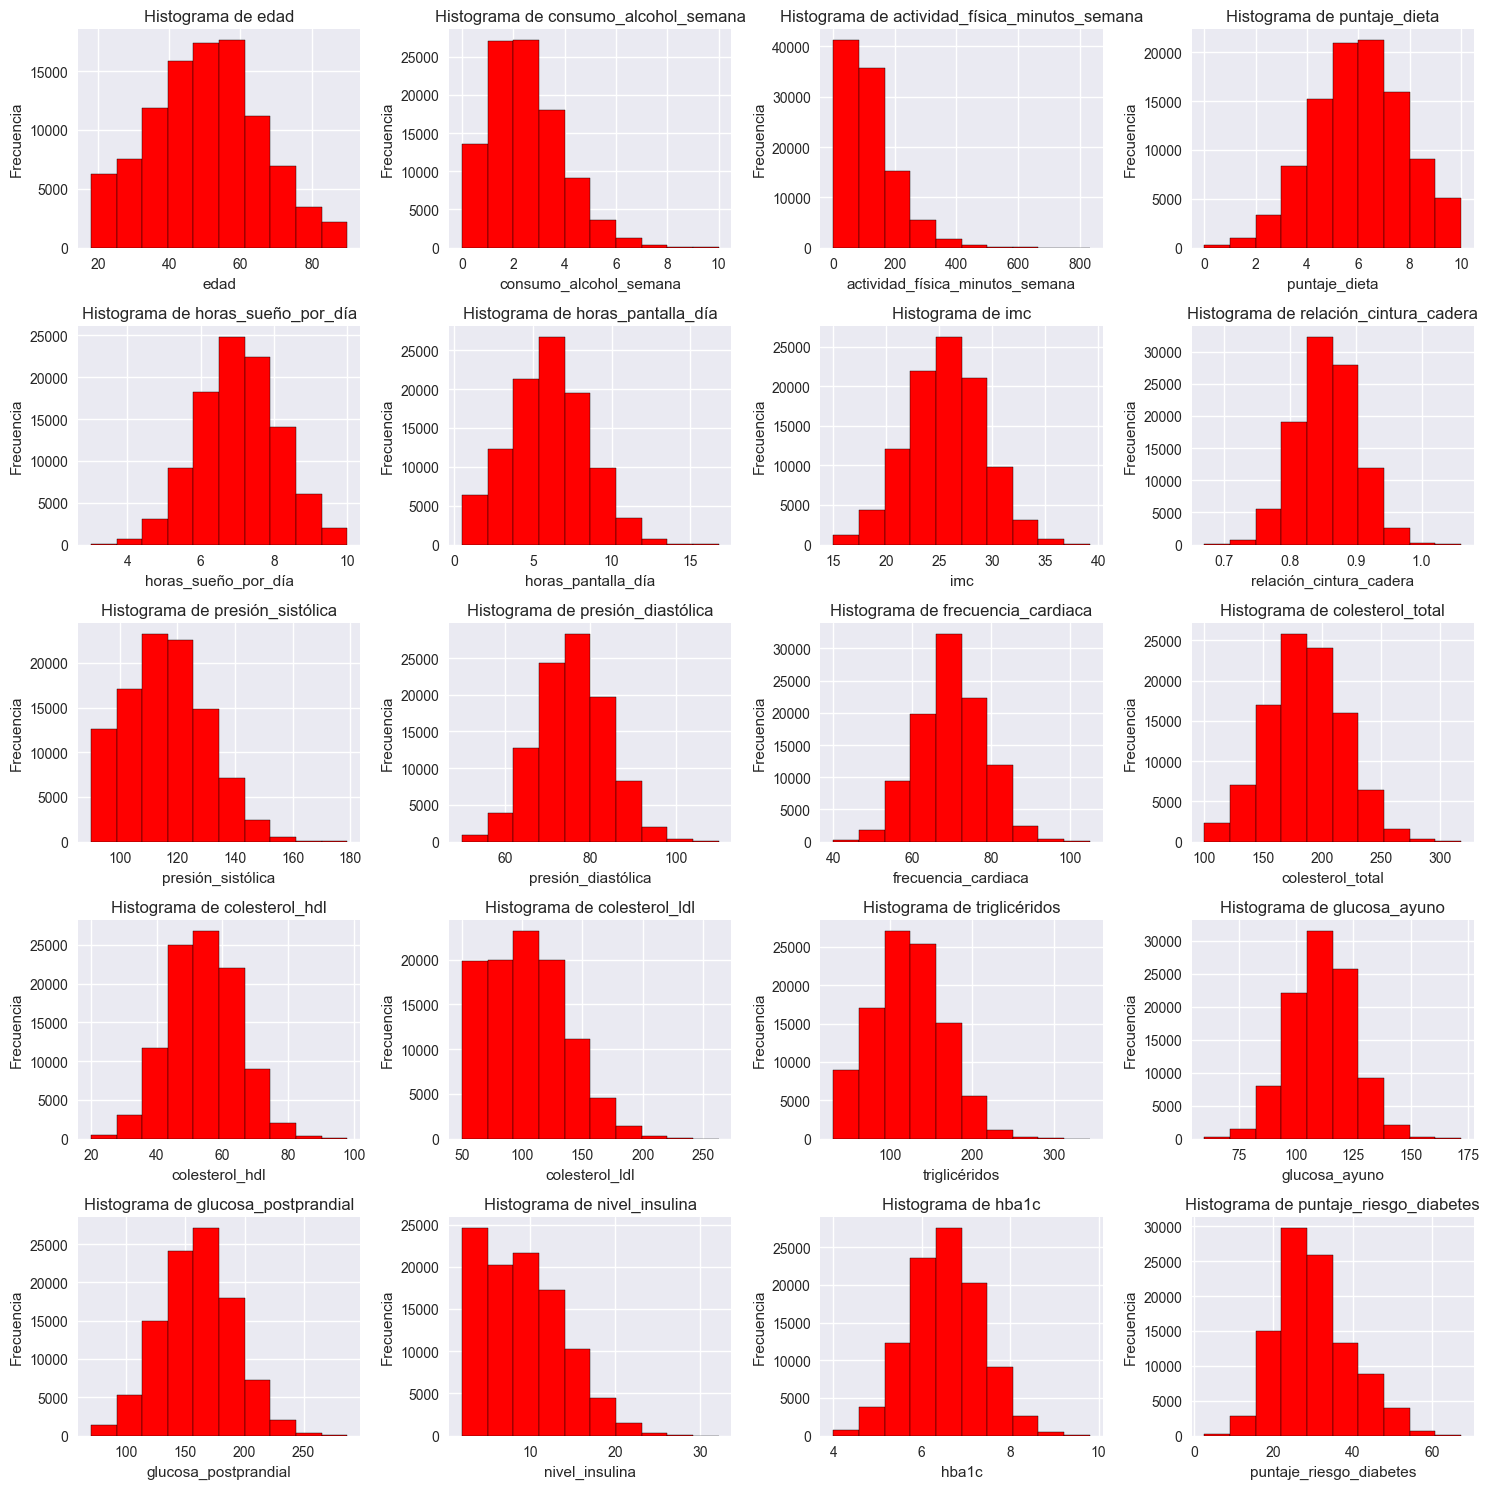

In [98]:
n = len(variables_numericas)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for index, var in enumerate(variables_numericas):

    ax = axes[index]

    ax.hist(df[var], bins=10, color="red", edgecolor="black")
    ax.set_title(f"Histograma de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frecuencia")

for j in range(index + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Los histogramas muestran que la mayoría de las variables del conjunto de datos tienen distribuciones aproximadamente normales, lo que significa un comportamiento poblacional estable, mientras que otras presentan una marcada asimetría hacia la derecha, especialmente aquellas relacionadas con estilo de vida y metabolismo, estas asimetrías sugieren la presencia de pocos valores muy altos que pueden influir en los análisis estadísticos por lo que mas adelante usaré una transformación logaritmica para disminuir el porcentaje de errores de las predicciones

utilizamos bloxpots para detectar outliers y ver la forma de la distribución de cada variable

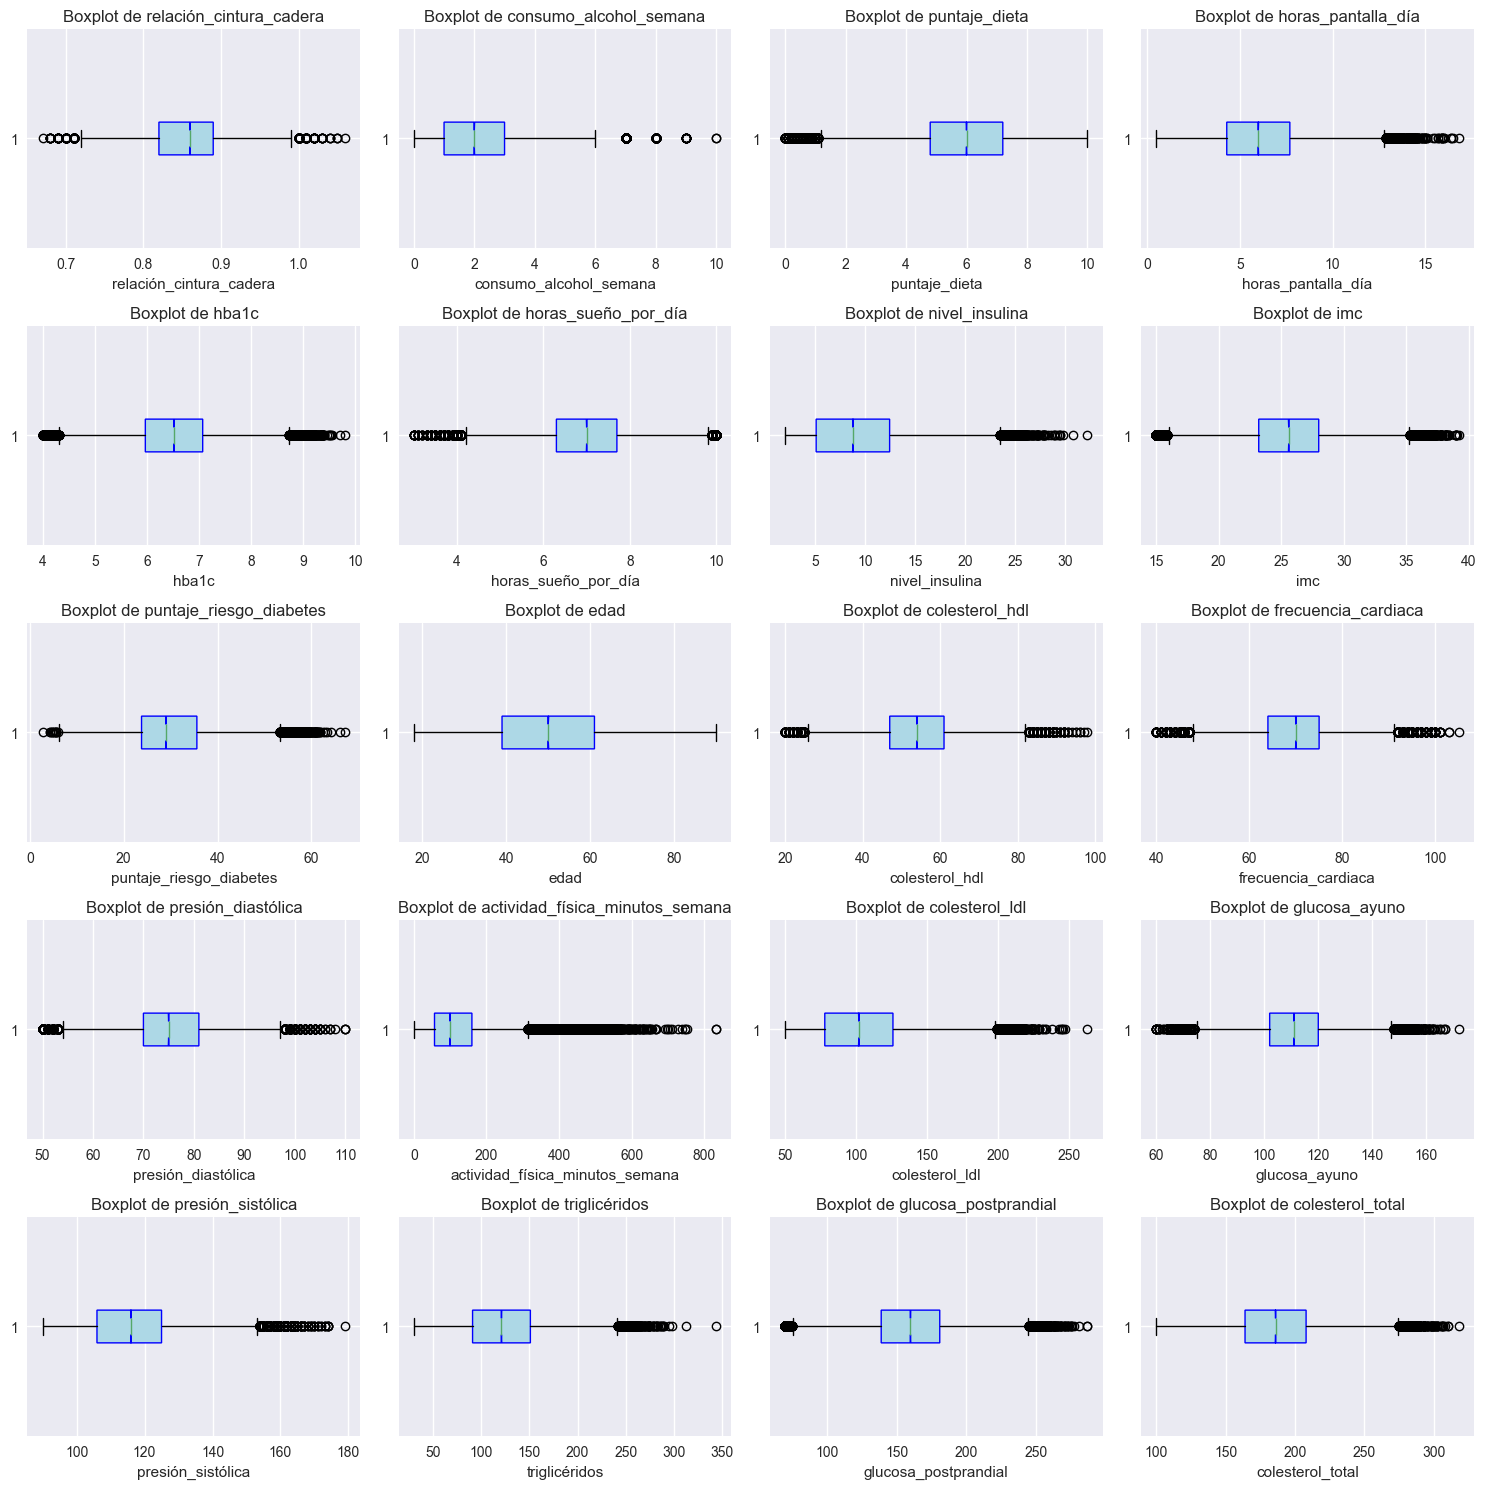

In [99]:
medianas = {var: df[var].median() for var in variables_numericas}
variables_ordenadas = sorted(variables_numericas, key=lambda x: medianas[x])

n = len(variables_ordenadas)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

axes = axes.flatten()

for index, var in enumerate(variables_ordenadas):

    ax = axes[index]

    ax.boxplot(
        df[var],
        patch_artist=True,
        notch=True,
        boxprops=dict(facecolor='lightblue', color='blue'),
        vert=False
    )

    ax.set_title(f"Boxplot de {var}")
    ax.set_xlabel(var)

for j in range(index + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

con los boxplots confirmamos la interpretación que surgió con los histogramas y también
se identificó la presencia de outliers en variables clínicas como glucosa, lípidos, presión arterial e insulina, así como en variables conductuales como horas de sueño, actividad física y consumo de alcohol, estos valores representan casos extremos que pueden distorsionar el comportamiento del modelo predictivo

asimismo, utilizamos graficos de barras para ver de manera general la distribución de los datos categóricos

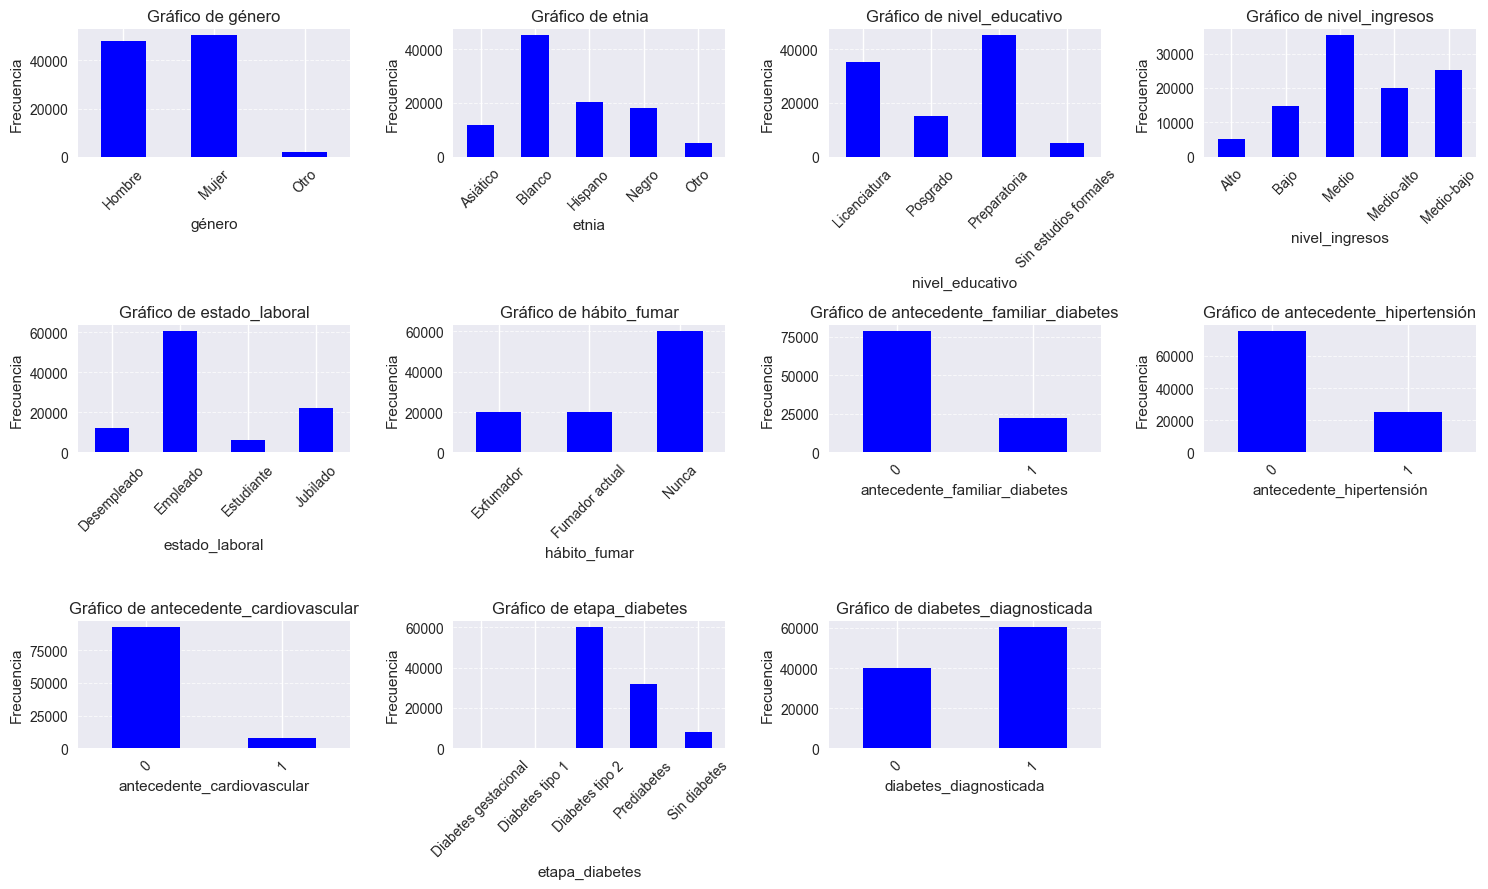

In [100]:
n = len(variables_categoricas)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for index, var in enumerate(variables_categoricas):

    ax = axes[index]

    df[var].value_counts().sort_index().plot(
        kind='bar',
        color='blue',
        ax=ax
    )

    ax.set_title(f'Gráfico de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel("Frecuencia")
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

for j in range(index + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Las gráficas de variables categóricas muestran que la población del estudio está equilibrada en género, con predominio de las etnias Blanco e Hispano, y presenta un nivel educativo mayoritariamente de licenciatura, la distribución del nivel de ingresos se concentra en los estratos medio, medio-bajo y medio-alto, mientras que la mayoría de los participantes se encuentra empleada, en hábitos, la mayor parte declara no haber fumado nunca, lo cual es favorable desde una perspectiva de salud pública, la mayoría no reporta antecedentes familiares de diabetes, hipertensión o enfermedades cardiovasculares, aunque existe un grupo importante que sí los presenta, en cuanto a la presencia de diabetes, la categoría con mayor frecuencia es diabetes tipo 2, seguida por prediabetes, lo que indica una carga significativa de esta enfermedad en la población

<h2>3. Correlación entre Variables<h2>

comenzamos con un mapa de calor para vber que variables tienen mayor relación entre sí

In [101]:
numericas_mapa_de_calor=df[['edad', 'consumo_alcohol_semana',
       'actividad_física_minutos_semana', 'puntaje_dieta',
       'horas_sueño_por_día', 'horas_pantalla_día', 'imc', 'relación_cintura_cadera',
       'presión_sistólica', 'presión_diastólica', 'frecuencia_cardiaca',
       'colesterol_total', 'colesterol_hdl', 'colesterol_ldl', 'triglicéridos',
       'glucosa_ayuno', 'glucosa_postprandial', 'nivel_insulina', 'hba1c',
       'puntaje_riesgo_diabetes']]

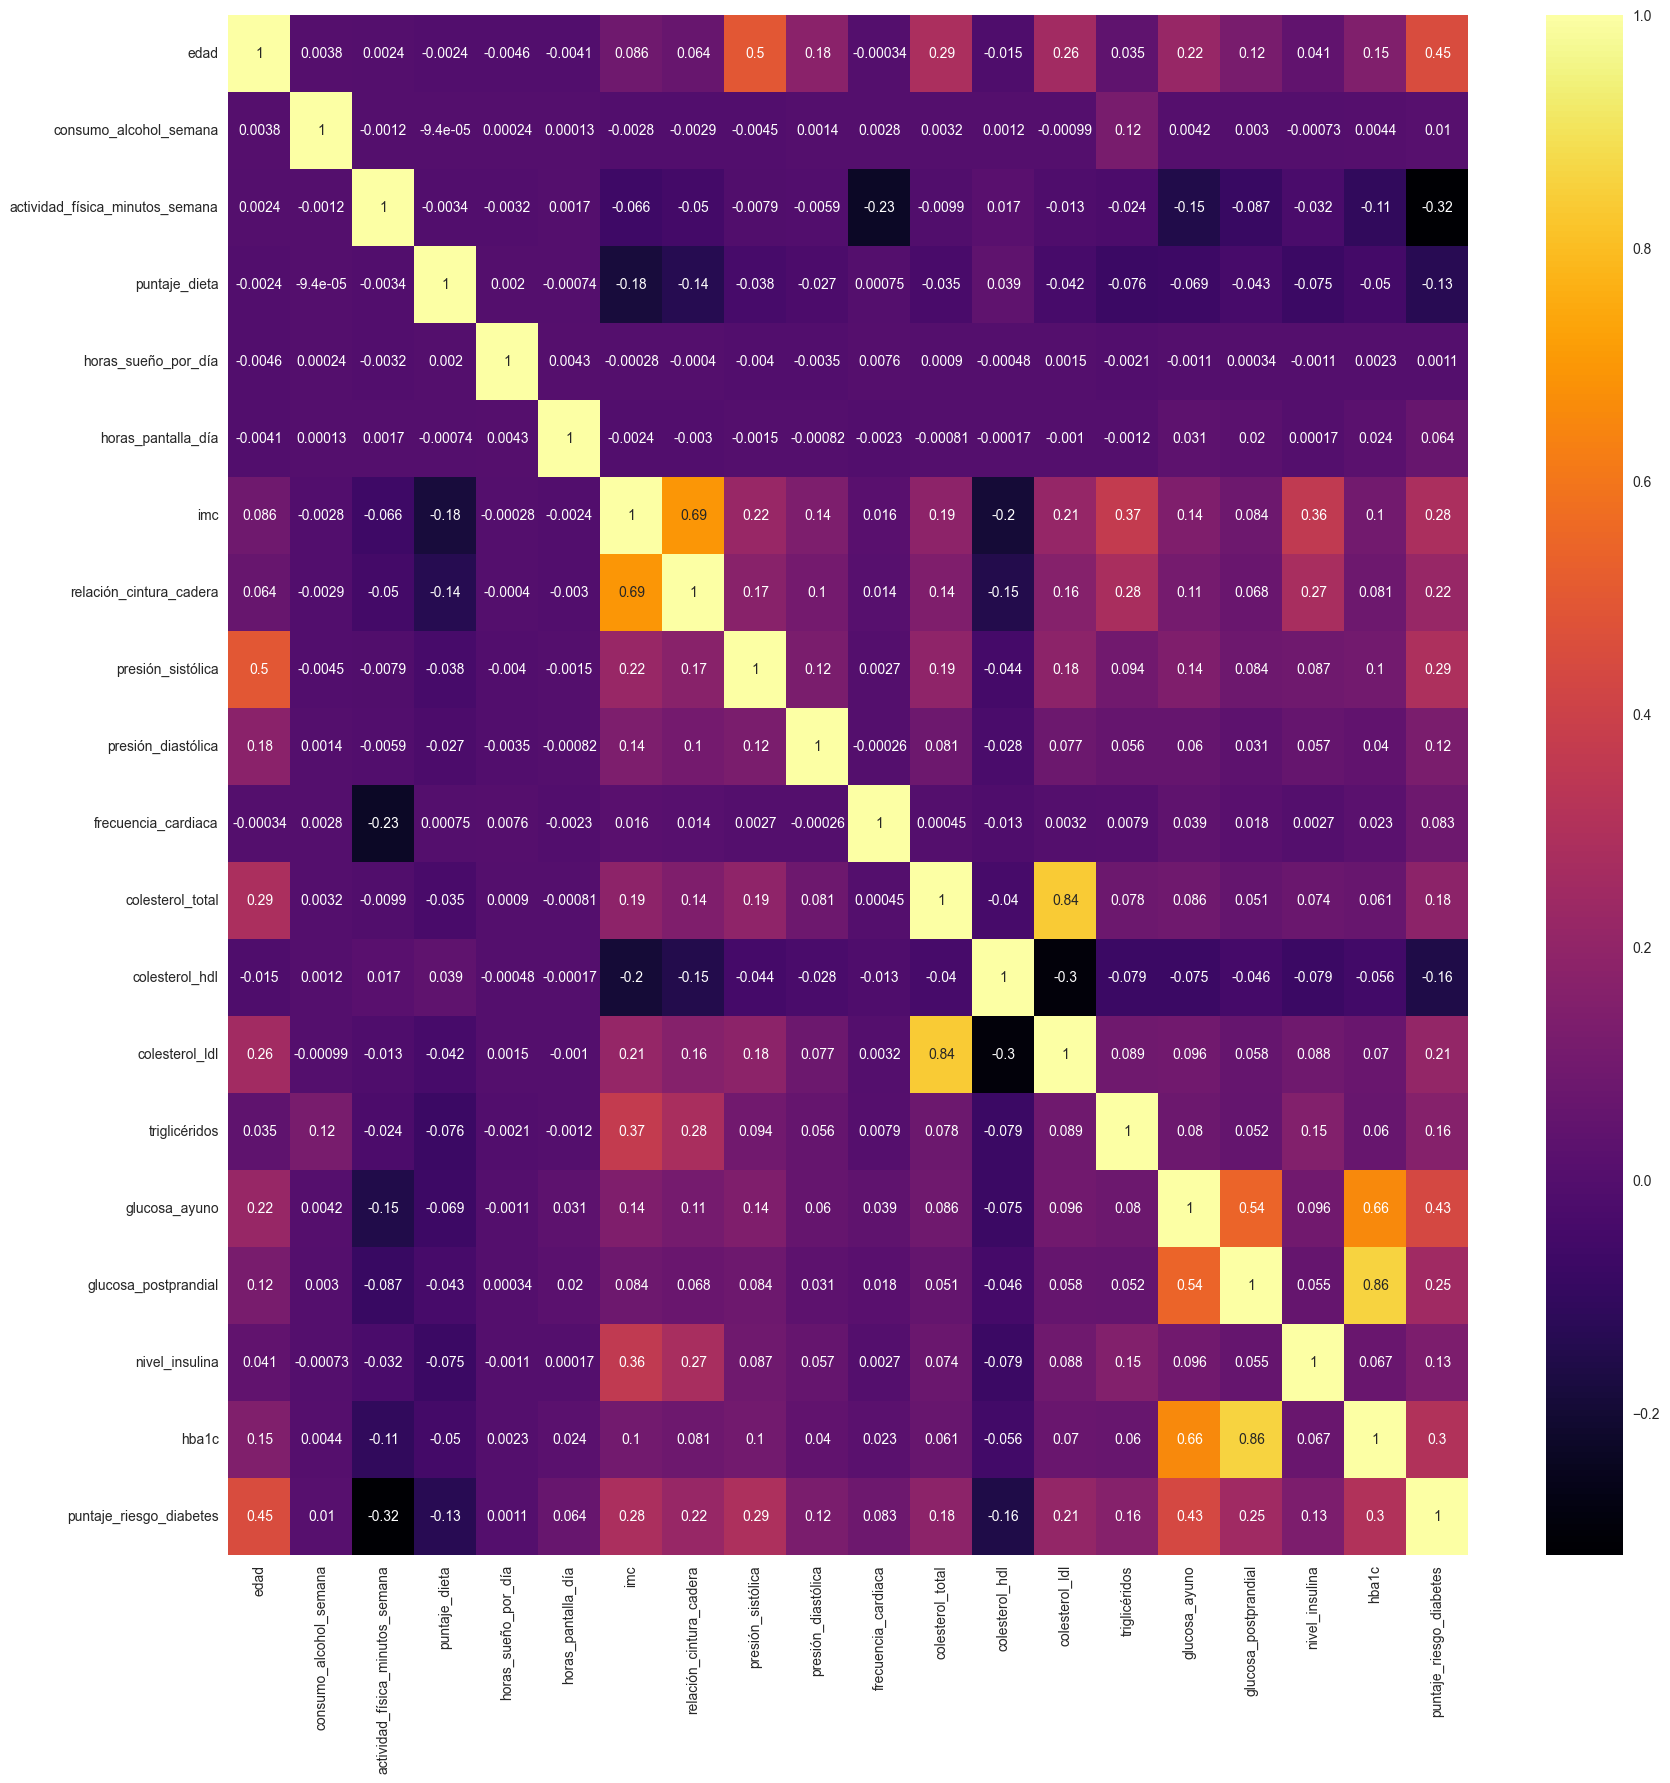

In [102]:
correlation_matrix =numericas_mapa_de_calor.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.show()

Principales relaciones asociadas al riesgo de diabetes:

-Glucosa en ayuno y glucosa posprandial tienen la correlación más alta con el puntaje de riesgo, lo que indica que los niveles elevados de glucosa son el principal indicador de propensión a diabetes

-HbA1c también muestra una correlación fuerte con ambas medidas de glucosa y con el riesgo general, confirmando que el control glucémico a largo plazo es un predictor clave

-Edad presenta una correlación moderada con el riesgo, lo que puede significar que la probabilidad de desarrollar diabetes aumenta conforme el paciente envejece

ahora hacemos scatter plots para las variables que muestran una relación en el mapa de calor

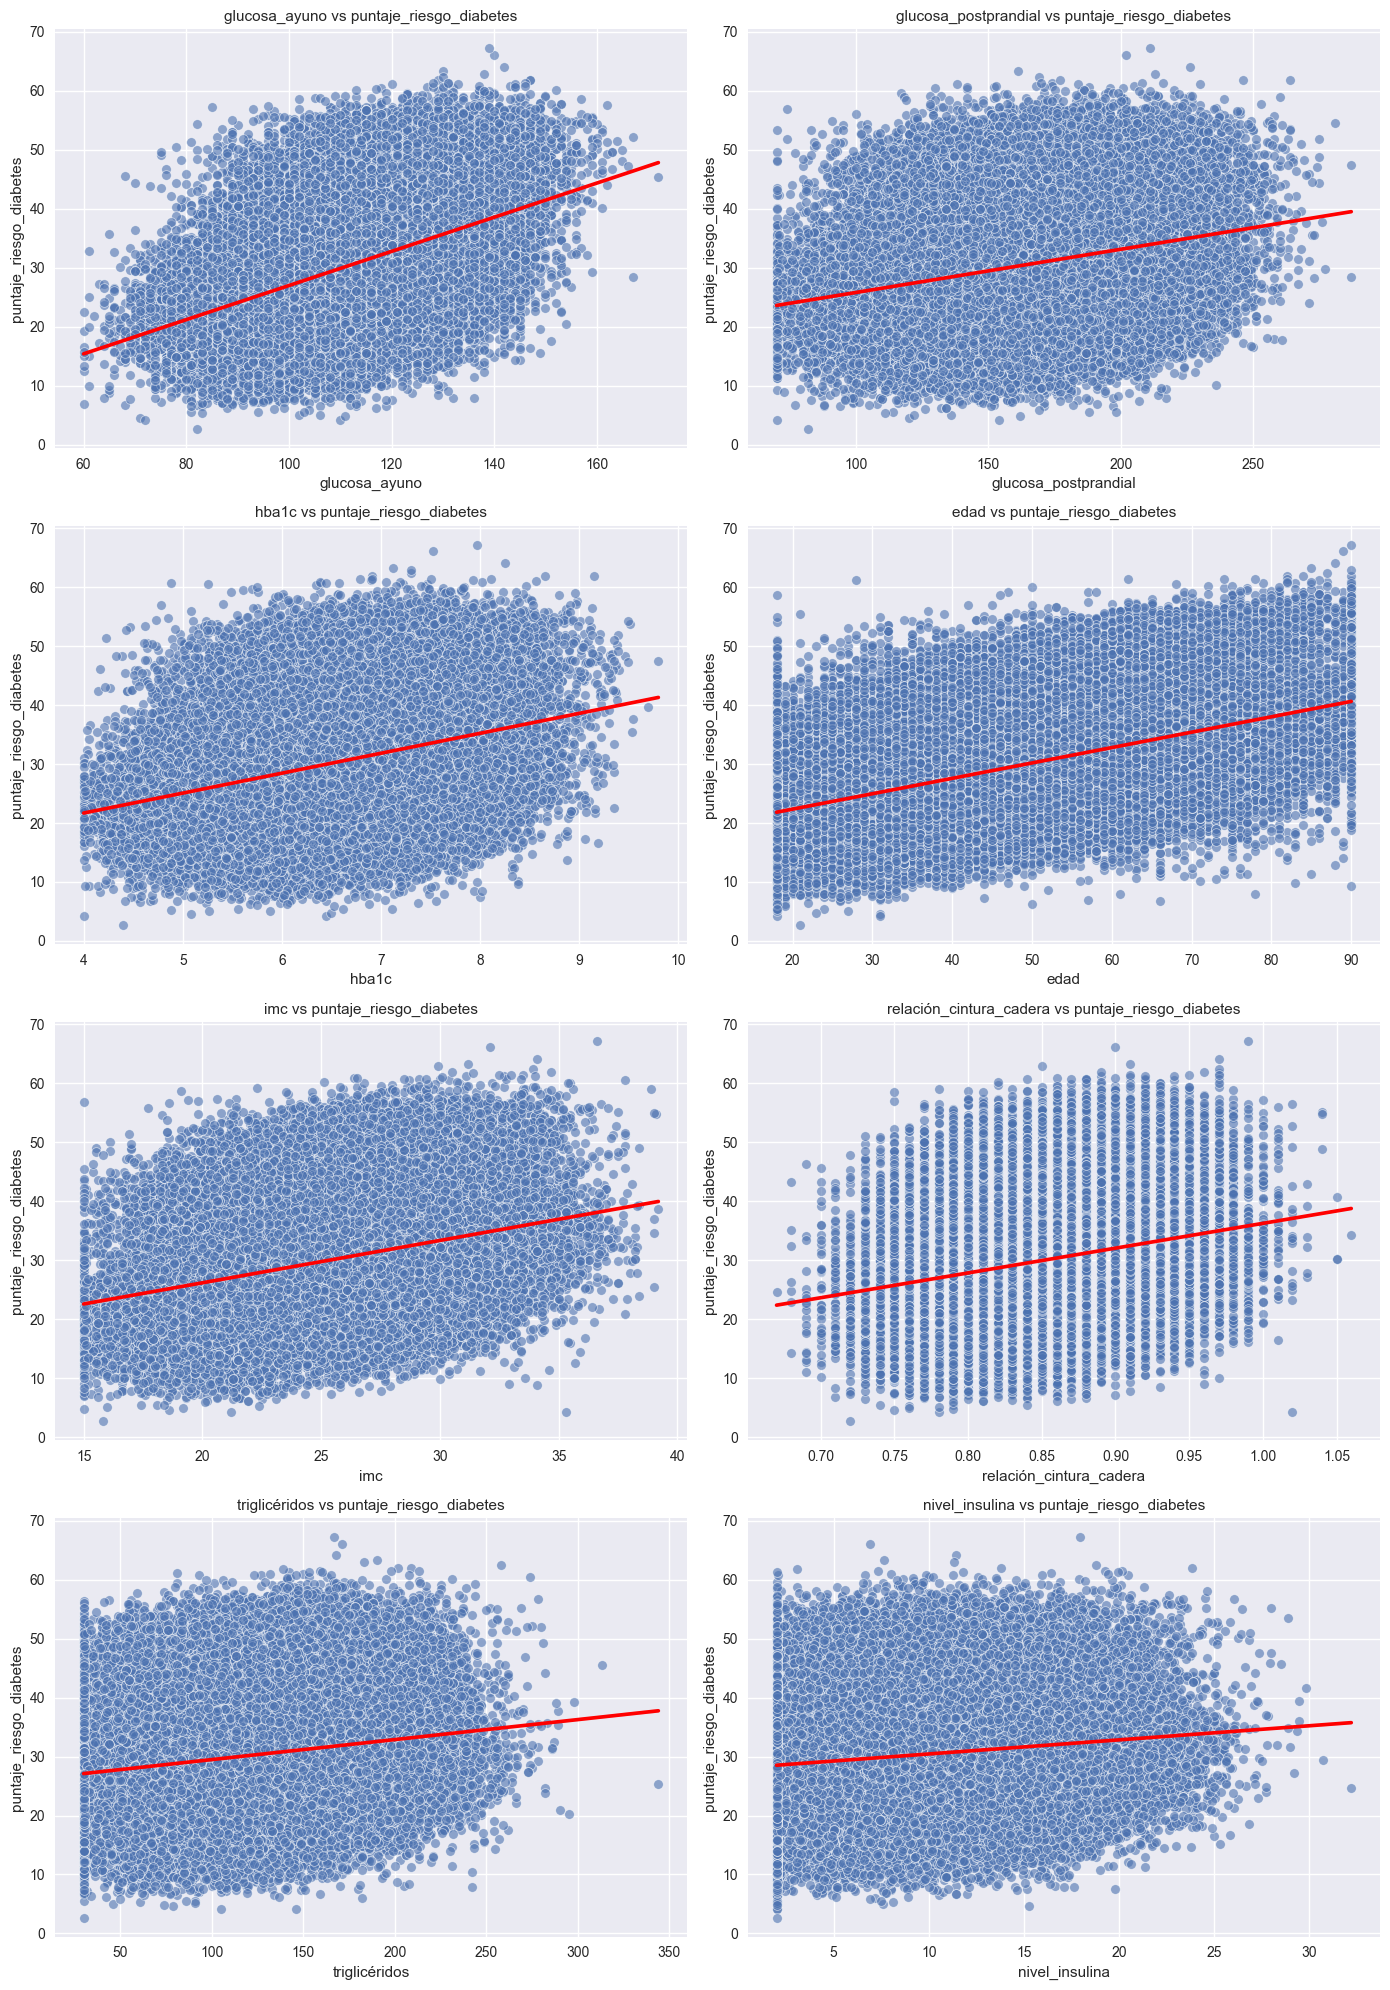

In [103]:
pairs = [
    ("glucosa_ayuno", "puntaje_riesgo_diabetes"),
    ("glucosa_postprandial", "puntaje_riesgo_diabetes"),
    ("hba1c", "puntaje_riesgo_diabetes"),
    ("edad", "puntaje_riesgo_diabetes"),
    ("imc", "puntaje_riesgo_diabetes"),
    ("relación_cintura_cadera", "puntaje_riesgo_diabetes"),
    ("triglicéridos", "puntaje_riesgo_diabetes"),
    ("nivel_insulina", "puntaje_riesgo_diabetes"),
]

rows = 4
cols = 2

plt.figure(figsize=(14, 20))

for idx, (x, y) in enumerate(pairs, 1):
    plt.subplot(rows, cols, idx)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color="red")
    plt.title(f"{x} vs {y}", fontsize=11)
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

Las gráficas muestran que las variables con mayor influencia en el puntaje de riesgo de diabetes son las relacionadas con metabolismo glucémico: glucosa en ayuno, glucosa posprandial y HbA1c, seguidas en menor medida por edad, IMC, relación cintura–cadera, y por último triglicéridos e insulina

<h2>4. Análisis de Valores Atípicos (Outliers)<h2>


ya habiamos detectado las variables con mayor sesgo en las graficas anteriormente con los histogramas y boxplots de las variables numericas, por lo que en este apartado solo se hará el tratamiento de dichos datos, utilizando una winsoriacion al percentil 1 y 99, lo que reemplaza los ooutliers extremos por datos dentro del limite, esto no cambia el tamaño de los datos.

In [104]:
def tratar_outliers_iqr(df, columnas):
    df_sin_outliers = df.copy()
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Winsorización
        df_sin_outliers[col] = df[col].clip(limite_inferior, limite_superior)

        print(f"Variable: {col}")
        print(f"  Límite inferior: {limite_inferior:.2f}")
        print(f"  Límite superior: {limite_superior:.2f}")
        print(f"  Outliers corregidos: {sum((df[col] < limite_inferior) | (df[col] > limite_superior))}")
        print("-"*50)

    return df_sin_outliers

df_sin_outliers = tratar_outliers_iqr(df, variables_numericas)

Variable: edad
  Límite inferior: 6.00
  Límite superior: 94.00
  Outliers corregidos: 0
--------------------------------------------------
Variable: consumo_alcohol_semana
  Límite inferior: -2.00
  Límite superior: 6.00
  Outliers corregidos: 460
--------------------------------------------------
Variable: actividad_física_minutos_semana
  Límite inferior: -97.50
  Límite superior: 314.50
  Outliers corregidos: 3227
--------------------------------------------------
Variable: puntaje_dieta
  Límite inferior: 1.20
  Límite superior: 10.80
  Outliers corregidos: 342
--------------------------------------------------
Variable: horas_sueño_por_día
  Límite inferior: 4.20
  Límite superior: 9.80
  Outliers corregidos: 901
--------------------------------------------------
Variable: horas_pantalla_día
  Límite inferior: -0.80
  Límite superior: 12.80
  Outliers corregidos: 299
--------------------------------------------------
Variable: imc
  Límite inferior: 16.00
  Límite superior: 35.20

<h2>5. Análisis de Valores Faltantes<h2>

como ya limpiamos los outliers, ahora trabajaremos sobre esa base de datos

porcentaje de valores faltantes por columna

In [105]:
faltantes = df_sin_outliers.isna().sum() / len(df) * 100
print(faltantes)

edad                               0.0
género                             0.0
etnia                              0.0
nivel_educativo                    0.0
nivel_ingresos                     0.0
estado_laboral                     0.0
hábito_fumar                       0.0
consumo_alcohol_semana             0.0
actividad_física_minutos_semana    0.0
puntaje_dieta                      0.0
horas_sueño_por_día                0.0
horas_pantalla_día                 0.0
antecedente_familiar_diabetes      0.0
antecedente_hipertensión           0.0
antecedente_cardiovascular         0.0
imc                                0.0
relación_cintura_cadera            0.0
presión_sistólica                  0.0
presión_diastólica                 0.0
frecuencia_cardiaca                0.0
colesterol_total                   0.0
colesterol_hdl                     0.0
colesterol_ldl                     0.0
triglicéridos                      0.0
glucosa_ayuno                      0.0
glucosa_postprandial     

no hay ningun valor faltante en ninguna columna

<h2>6. Relación entre Variables Categóricas y Numéricas<h2>

creamos violinplots entre las variables mas destacables

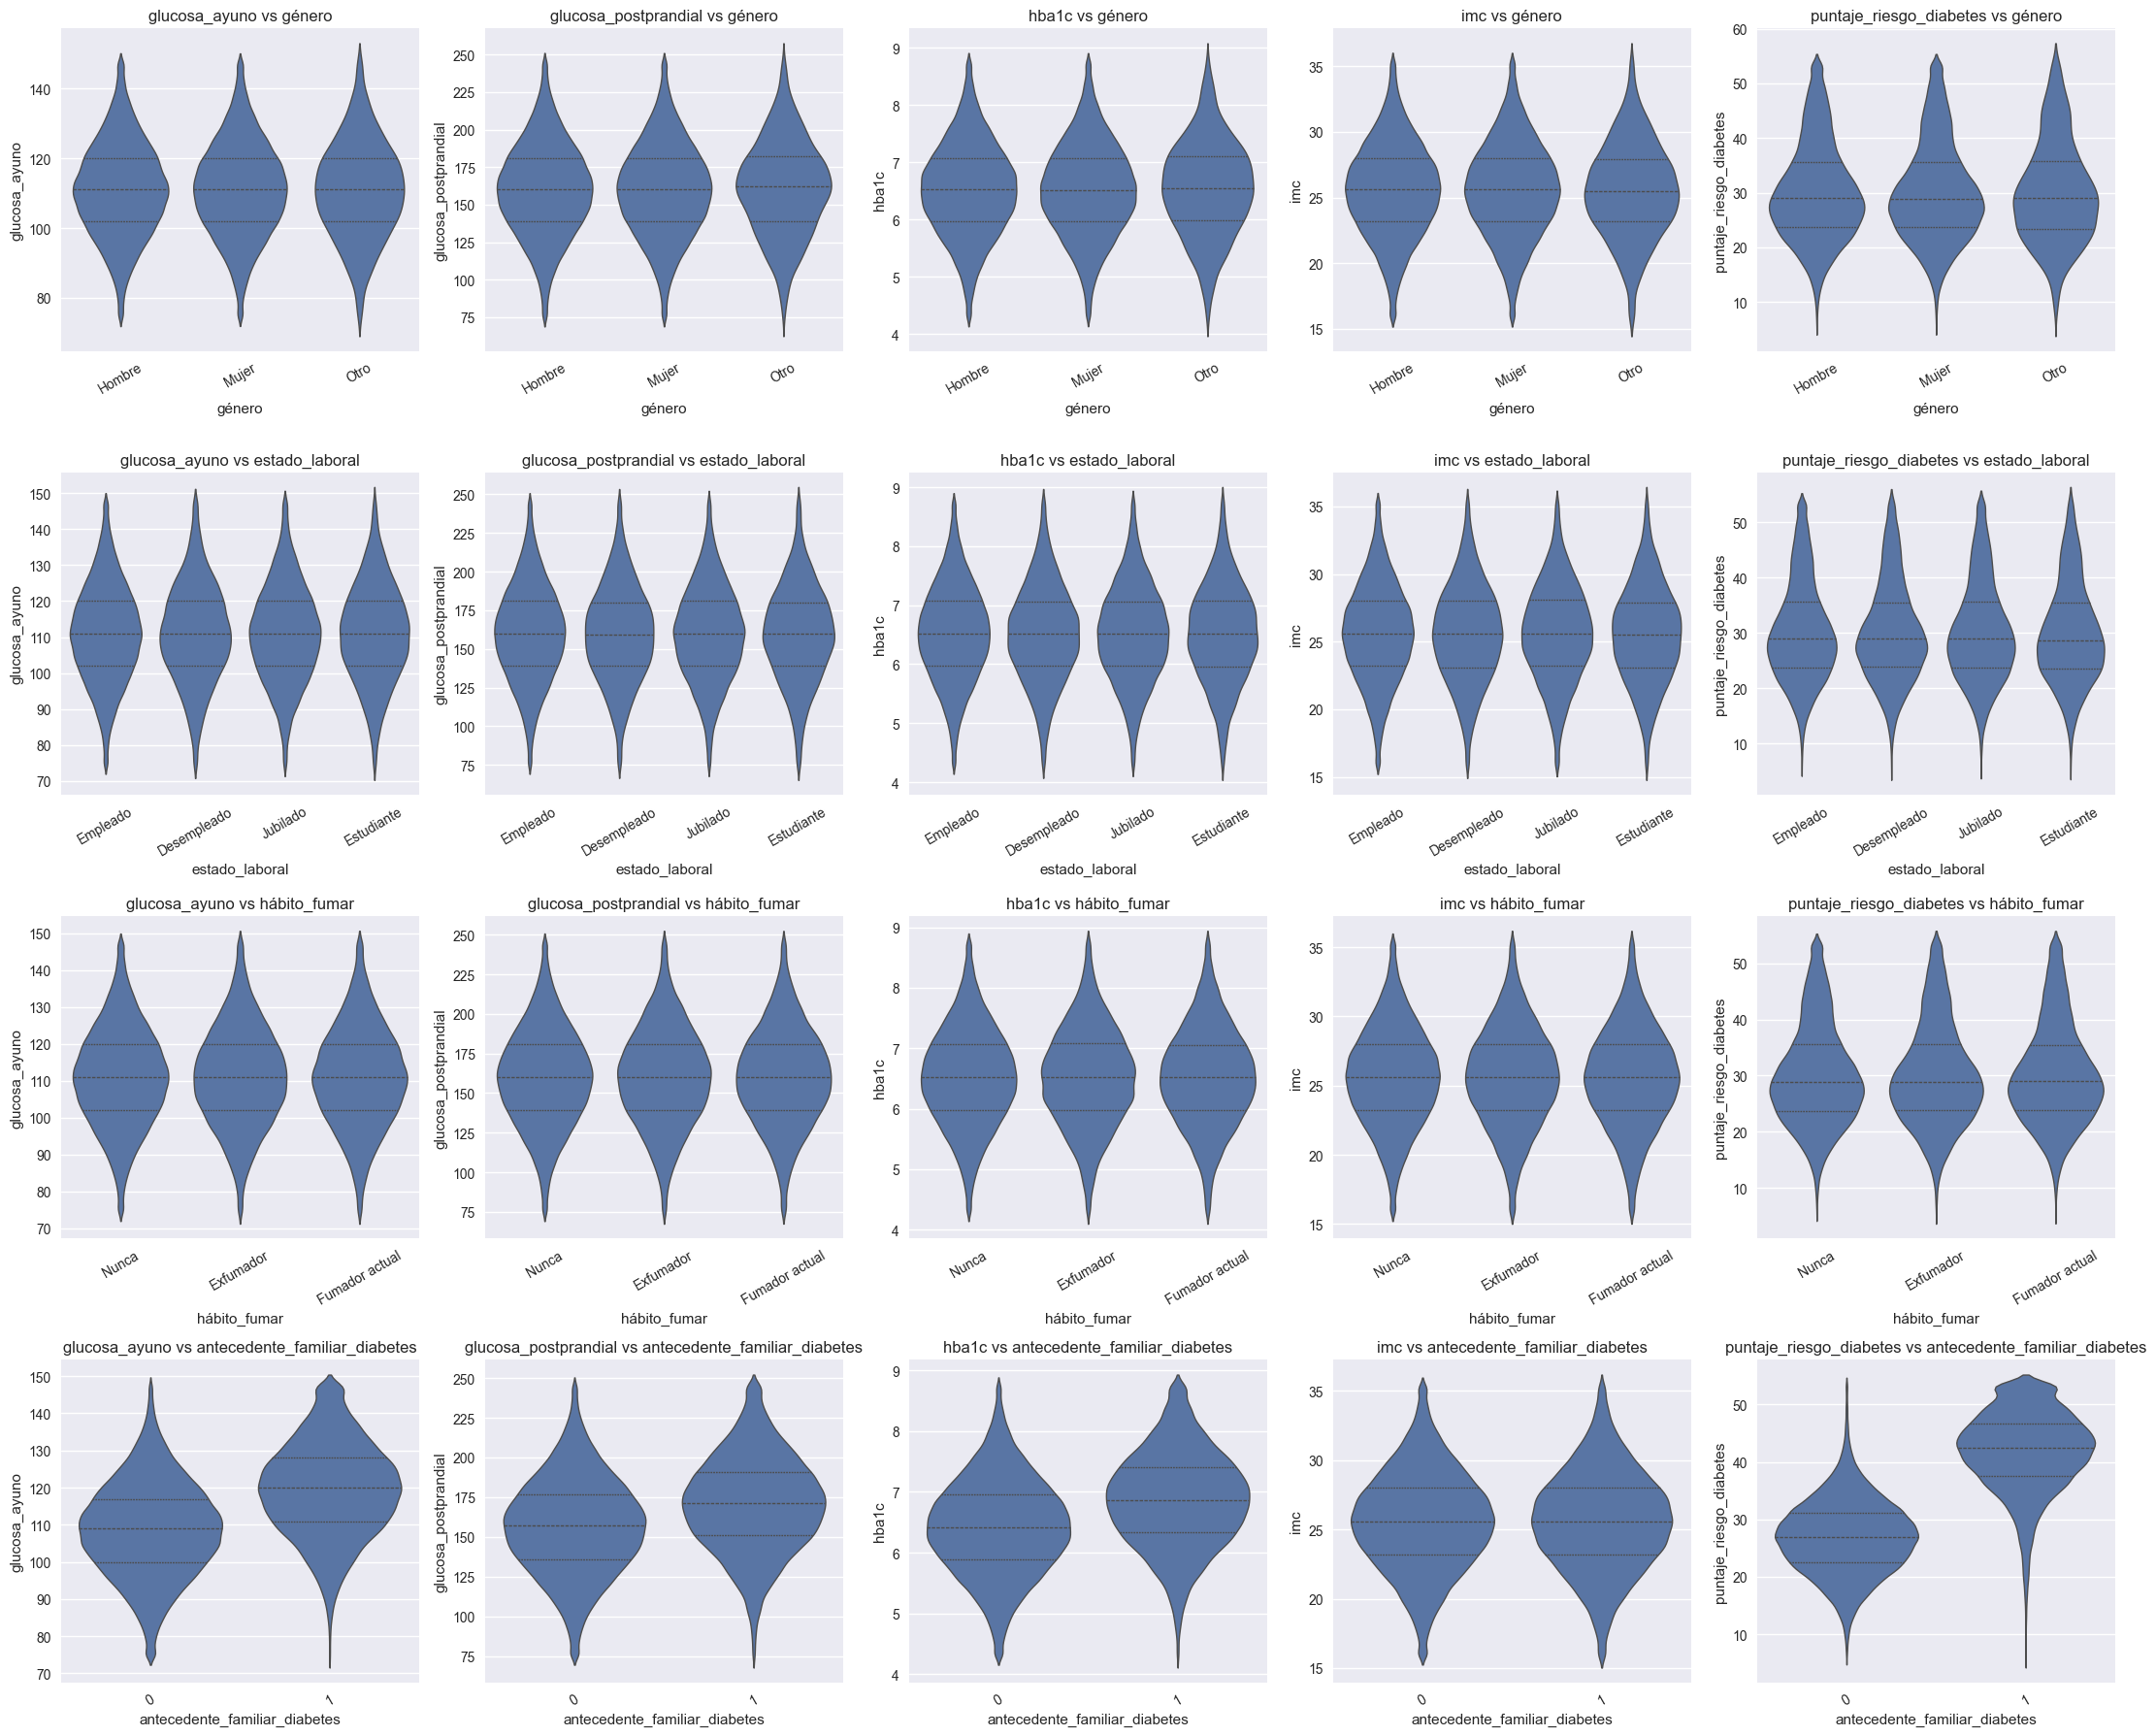

In [106]:
categoricas = ["género", "estado_laboral", "hábito_fumar", "antecedente_familiar_diabetes"]
numericas = ["glucosa_ayuno", "glucosa_postprandial", "hba1c", "imc", "puntaje_riesgo_diabetes"]

fig, axes = plt.subplots(len(categoricas), len(numericas), figsize=(22, 18))

for i, cat in enumerate(categoricas):
    for j, num in enumerate(numericas):
        sns.violinplot(
            data=df_sin_outliers,
            x=cat,
            y=num,
            ax=axes[i, j],
            inner="quartile",
            linewidth=1
        )
        axes[i, j].set_title(f"{num} vs {cat}")
        axes[i, j].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Los violin plots permitieron evaluar cómo se distribuyen variables numéricas relacionadas con el riesgo de diabetes según distintas variables categóricas. En general, género y hábito de fumar mostraron distribuciones muy similares entre categorías, indicando que en este dataset no presentan un impacto notable sobre glucosa, HbA1c, IMC o puntaje de riesgo.

El estado laboral mostró diferencias leves, principalmente en la dispersión de los valores, pero sin cambios significativos en las medianas. La variable con mayor influencia observable fue el antecedente familiar de diabetes, ya que en este grupo se identificaron valores ligeramente más altos en glucosa posprandial, HbA1c y puntaje de riesgo.

<h2>7. Observaciones y Hallazgos Importantes<h2>

1. Perfil de la Población: Alto Riesgo Metabólico
El hallazgo más contundente es que esta base de datos no representa a una población general sana, sino a una población altamente patológica o de alto riesgo:
el 91.65% de los registros en la muestra ya tiene una alteración metabólica significativa (59.8% Diabetes Tipo 2 y 31.9% Pre-Diabetes).
Tipos Raros: La Diabetes Tipo 1 y Gestacional representan una fracción marginal (< 0.5%), lo que dificulta su predicción sin técnicas de balanceo de datos.

2. Factores de Riesgo Predominantes:
El Antecedente Familiar de Diabetes es el factor predictivo aislado más importannte (aprox. 25% de importancia), si tus padres la tienen, tu riesgo se dispara.
La Edad: Es el segundo factor más importante; a mayor edad, mayor acumulación de riesgo metabólico.
Estilo de Vida: La Actividad Física (min/semana) y el IMC son los factores modificables más influyentes.

3. Estado Clínico Promedio
HbA1c Promedio: 6.52%.
IMC Promedio: 25.6, situa a la media de la población en la categoría de Sobrepeso.
Glucosa en Ayuno: 111.1 mg/dL, un valor típico de Pre-Diabetes.

<h2>Machine learning<h2>

para hacer las predicciones, escogí el modelo Random forest ya que mi base de datos cuenta con gran cantidad de datos numericos y categoricos, los cuales random forest puede manejar sin demasiadas transformaciones nuemricas, tambien porque nos indica cuales variables son mas importantes para nuestro objetivo.

In [127]:

df_model_randomforest = df.copy()

print("="*50)
print("DATASET ")
print("="*50)
print(f"tamaño del dataset: {df_model_randomforest.shape}")
print(f"distribucion de etapa de diabetes\n{df_model_randomforest['etapa_diabetes'].value_counts()}")

df_model_randomforest['etapa_de_diabetes_combinada'] = df_model_randomforest['etapa_diabetes']
rare_classes = ['Diabetes tipo 1', 'Diabetes gestacional']
df_model_randomforest.loc[df_model_randomforest['etapa_diabetes'].isin(rare_classes), 'etapa_de_diabetes_combinada'] = 'otro'

print("\ndistribucion de diabetes combinada")
print(df_model_randomforest['etapa_de_diabetes_combinada'].value_counts())

numerical_features = [
    'edad', 'consumo_alcohol_semana', 'actividad_física_minutos_semana',
    'puntaje_dieta', 'horas_sueño_por_día', 'horas_pantalla_día',
    'antecedente_familiar_diabetes', 'antecedente_hipertensión', 'antecedente_cardiovascular',
    'imc', 'relación_cintura_cadera', 'presión_sistólica', 'presión_diastólica', 'frecuencia_cardiaca',
    'colesterol_total', 'colesterol_hdl', 'colesterol_ldl', 'triglicéridos',
    'glucosa_ayuno', 'glucosa_postprandial', 'nivel_insulina', 'hba1c'
]

categorical_features = ['género', 'etnia', 'nivel_educativo', 'nivel_ingresos',
                        'estado_laboral', 'hábito_fumar']

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df_model_randomforest['etapa_de_diabetes_combinada'])
print(f"clases objetivo: {target_encoder.classes_}")

X = df_model_randomforest[numerical_features + categorical_features].copy()
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
feature_columns = X.columns.tolist()

print(f"factores totales {len(feature_columns)}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"tamaño del entrenamiento: {X_train.shape}")
print(f"tamaño de prueba: {X_test.shape}")

X_train_processed = X_train
X_test_processed = X_test

#MODELO RANDOM FOREST

print("\n" + "="*50)
print("MODELO RANDOM FOREST")
print("="*50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)

rf_model.fit(X_train_processed, y_train)
y_pred = rf_model.predict(X_test_processed)

precision = accuracy_score(y_test, y_pred)
print(f"\nprecisión: {precision:.4f}")

print("\nreporte de clasificacion:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Factores:")
for i, row in importances.head(10).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

print("\nMatriz de confusión (Filas: Real, Columnas: Predicción):")
print(confusion_matrix(y_test, y_pred))



DATASET 
tamaño del dataset: (100401, 31)
distribucion de etapa de diabetes
etapa_diabetes
Diabetes tipo 2         60027
Prediabetes             31988
Sin diabetes             7990
Diabetes gestacional      276
Diabetes tipo 1           120
Name: count, dtype: int64

distribucion de diabetes combinada
etapa_de_diabetes_combinada
Diabetes tipo 2    60027
Prediabetes        31988
Sin diabetes        7990
otro                 396
Name: count, dtype: int64
clases objetivo: ['Diabetes tipo 2' 'Prediabetes' 'Sin diabetes' 'otro']
factores totales 40
tamaño del entrenamiento: (80320, 40)
tamaño de prueba: (20081, 40)

MODELO RANDOM FOREST

precisión: 0.8826

reporte de clasificacion:
                 precision    recall  f1-score   support

Diabetes tipo 2       0.97      0.85      0.90     12006
    Prediabetes       0.79      0.95      0.86      6398
   Sin diabetes       0.80      0.92      0.86      1598
           otro       0.00      0.00      0.00        79

       accuracy            

El modelo tiene una precisión del 88.26%. Esto significa que de cada 100 pacientes que el modelo evalúa, clasifica correctamente la etapa de diabetes de 88 de ellos, lo cual representa un excelente rendimiento para un entorno médico.

Análisis por Categoría:

Diabetes Tipo 2:

Tiene una Precisión del 97%. Esto significa que cuando el modelo detecta un paciente con diabetes tipo 2, es muy probable que sea verdad.
sin embargo su Recall es del 85%, esto significa que se le escapan el 15% de los diabéticos reales y los clasifica erróneamente en otra categoría.

Prediabetes:

Tiene un Recall del 95%., el modelo es una excelente herramienta, ya que detecta a casi todos los prediabéticos.

Sin Diabetes:

Detectando correctamente al 92% de las personas sanas.

Que datos usó el modelo para decidir: 

El modelo le dió prioridad a los análisis de sangre:
HbA1c (26%) y Glucosa en ayuno (15%) fueron los factores principales.
El factor demográfico más importante fue la Edad (9%).
La Presión Sistólica y la Actividad Física jugaron un papel secundario pero relevante.

Interpretación de la Matriz de Confusión (Los errores)
La matriz nos dice dónde se equivocó el modelo exactamente:

Hubo 1,548 personas con Diabetes Tipo 2 que el modelo clasificó incorrectamente como Prediabetes. Esto confirma que hay una "zona gris" clínica donde los valores de estos pacientes están justo en el límite.

El acierto: Clasificó correctamente a 10,167 diabéticos y 6,084 prediabéticos, lo cual valida la utilidad del modelo para la gran mayoría de la población.

a continuación generamos una grafica de barras que compara las predicciones del modelo de machine learning, los registros reales y las predicciones de nuestro modelo

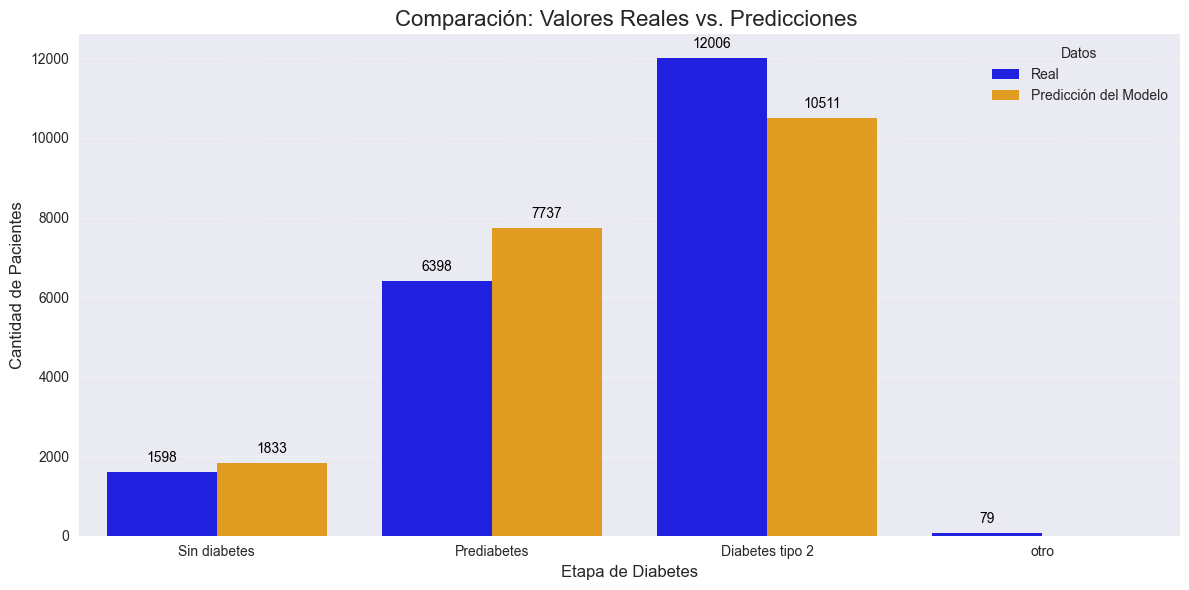

In [ ]:

y_test_labels = target_encoder.inverse_transform(y_test)
y_pred_labels = target_encoder.inverse_transform(y_pred)

df_real = pd.DataFrame(y_test_labels, columns=['Etapa'])
df_real['Tipo'] = 'Real'

df_pred = pd.DataFrame(y_pred_labels, columns=['Etapa'])
df_pred['Tipo'] = 'Predicción del Modelo'

df_plot = pd.concat([df_real, df_pred])

plt.figure(figsize=(12, 6))

orden_barras = ['Sin diabetes', 'Prediabetes', 'Diabetes tipo 2', 'otro']

ax = sns.countplot(
    data=df_plot,
    x='Etapa',
    hue='Tipo',
    order=orden_barras, 
    palette={'Real': 'blue', 'Predicción del Modelo': 'orange'}
)

plt.title('Comparación: Valores Reales vs. Predicciones ', fontsize=16)
plt.xlabel('Etapa de Diabetes', fontsize=12)
plt.ylabel('Cantidad de Pacientes', fontsize=12)
plt.legend(title='Datos')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()